In [5]:
'''--------
| Modules |
--------'''
import sklearn.neighbors as skn
import sklearn.model_selection as skts
import numpy as np
import pandas as pd

In [24]:
'''--------
| Options |
--------'''

trials = 5
plot_name = "./k5.png"

In [21]:
'''---------------
| Data Functions |
---------------'''
# Functions for importing and parsing data.

# Purpose:   To import and split data for training and for validation from a .csv file.
# Arguments: (1) Link to csv data in a form that can be accessed by
#                the "read_csv" function of pandas, url, or file with
#                path.
#            (2) Floating-point decimal from 0 to 1 representing how much
#                data should be used for training.
# Output:    Two np arrays. The first containing the data to be used in training and
#            the second the remainder of the data to be used for testing.
def load_dataset(filename):
    df = pd.read_csv(filename, header=None)
    array = df.to_numpy()
    #random.shuffle(array)
    return array

# Purpose:
# Arguments: (1) Nested, sliceable datastructure containing features with the label
#                as the final entry. Level-one caintaining all entries and level-two
#                containing the features and label.
# Output:    Two lists. One containing all class features in their original order and
#            a second containing all class labels in their original order.
def label_feature_split(data):
    feature_collection = []
    label_collection   = []
    for entry in data:
        feature_collection.append(entry[:-1])
        label_collection.append(entry[-1])
    feature_collection = [list(i) for i in feature_collection]
    return feature_collection, label_collection

In [25]:
'''---------------------------
| Model Generation an Testing|
---------------------------'''
# Generation and testing of varied knn k value.

import sklearn.neighbors as skn
import sklearn.model_selection as skts
import numpy as np

# Training data
training_set = []
# Test data
test_set = []
# Url to .csv containing data
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
data = load_dataset(url)
feature_collection, label_collection = label_feature_split(data)


# Dict to contain results. K-value as index and results in a list.
n_with_score = dict()
for test_n in range(0, trials):
    # Split data before varying k. Ensures that k is the only factor being changed.
    feature_train, feature_test, label_train, label_test = skts.train_test_split(feature_collection, 
                                                                             label_collection, 
                                                                             test_size = 0.20)
    for n in range(1, 21):
        # If index not present in dictionary then add it.
        if n in n_with_score:
            pass
        else:
            n_with_score[n] = []
        # knn code
        hood = skn.KNeighborsClassifier(n_neighbors = n)
        hood.fit(feature_train, label_train)
        score = hood.score(feature_test, label_test)
        n_with_score[n].append(score)
        
# Lists to store average score data.
plot_data_x = []
plot_data_y = []
# Calculate means for each k value. 
for key in n_with_score:
    n_with_score[key] = np.mean(np.array(n_with_score[key]))
    plot_data_x.append(int(key))
    plot_data_y.append(n_with_score[key])

In [19]:
print(n_with_score)


{1: 0.9566333333333334, 2: 0.9445666666666669, 3: 0.9600000000000001, 4: 0.9568000000000001, 5: 0.9628, 6: 0.9592333333333334, 7: 0.9632000000000001, 8: 0.9621333333333334, 9: 0.9641000000000002, 10: 0.9617, 11: 0.9645000000000001, 12: 0.9621000000000001, 13: 0.9661666666666667, 14: 0.9624000000000001, 15: 0.9656333333333335, 16: 0.9616333333333335, 17: 0.9643333333333334, 18: 0.9586666666666668, 19: 0.9591000000000002, 20: 0.9533333333333335}


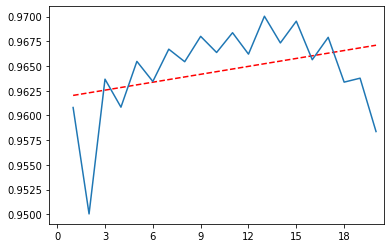

In [26]:
'''--------------
| Visualization |
--------------'''

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure()
ax = plt.axes()

# Be sure to only pick integer tick locations.
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add trendline
z = np.polyfit(plot_data_x, plot_data_y, 1)
p = np.poly1d(z)
ax.plot(plot_data_x, p(plot_data_x),"r--")
    
plt.xlim(-0.5, 20.5)
ax.plot(plot_data_x, plot_data_y);

plt.savefig(plot_name)

In [147]:
ls

iris.data  k1000.png  knn.ipynb
